# 8: 数学

<a href="https://nb.bohrium.dp.tech/detail/8241862179?utm_source=ck-github" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>

Python 本质上是通过算术、微积分、代数和布尔逻辑等方式执行数学运算的，在这一章将更深入地探讨符号数学、矩阵运算和积分。这一章的一些内容将依赖于 SciPy 和 NumPy，但对于符号数学，我们将使用流行的 [SymPy 库](http://www.sympy.org/en/index.html)。

SymPy 是 SciPy 生态系统中执行符号数学的主要库，适合从高中生到科学研究人员的广泛受众。它有点像一个免费的、开源的 Mathematica 替代品，建立在 Python 上，在成本和获取方便性方面可以说更容易获得。以下所有的 SymPy 代码都依赖于以下导入，这使得所有的 SymPy 模块都可用。

In [2]:
import sympy

## 8.1 符号数学

SymPy 与 Python 和 SciPy 栈的其他部分有所不同，它返回精确或符号结果，而 Python、SciPy 和 NumPy 会生成可能不精确的数值答案。也就是说，SymPy 不仅执行符号数学操作，而且即使操作的结果有数值答案，SymPy 也会以精确形式返回该值。例如，如果我们使用 `math` 模块求 2 的平方根，我们会得到一个数值。

In [3]:
import math
math.sqrt(2)

1.4142135623730951

返回的值是真实答案的四舍五入近似值。相反，如果使用SymPy执行相同的操作，我们会得到不同的结果。

In [4]:
sympy.sqrt(2)

sqrt(2)

因为2的平方根是一个无理数，所以它不能用小数表示，因此SymPy将其保留为$\sqrt{2}$的精确形式。如果我们确实需要一个数值，可以使用`evalf()`方法指示SymPy计算一个不精确的数值。

In [5]:
sympy.sqrt(2).evalf()

1.41421356237310

`evalf()`的一个优点是它也接受有效数字参数。

In [6]:
sympy.sqrt(2).evalf(30)

1.41421356237309504880168872421

In [7]:
sympy.pi.evalf(40)

3.141592653589793238462643383279502884197

### 8.1.1 符号

在SymPy接受一个变量作为符号之前，必须先使用`symbols()`函数将变量定义为SymPy符号。它可以一次接受一个或多个符号并将它们附加到变量上。

In [8]:
x, c, m = sympy.symbols('x c m')

In [9]:
x

x

由于`x`是一个符号，没有附加任何值，所以现在它可以用来生成符号数学表达式。

In [10]:
E = m*c**2

In [11]:
E

c**2*m

In [12]:
E**2

c**4*m**2

SymPy也可以用来求解数值表达式，有时只有某些范围或类型的数值才有物理意义。例如，浓度应该只是非负实数。为了将表达式的解限制在正数和非负数范围内，可以向`sympy.symbols()`函数添加额外的参数，称为谓词，例如`nonnegative=True`或`real=True`。

In [13]:
y = sympy.symbols('y', real=True, nonnegative=True)

要查看对变量施加了哪些约束，请使用下面演示的`assumptions()`函数。

In [14]:
from sympy.core.assumptions import assumptions
assumptions(y)

{'real': True,
 'hermitian': True,
 'extended_real': True,
 'infinite': False,
 'finite': True,
 'complex': True,
 'commutative': True,
 'imaginary': False,
 'nonnegative': True,
 'negative': False,
 'extended_nonnegative': True,
 'extended_negative': False}

以下表1中列出了`sympy.symbols()`函数的一些谓词参数。这不是一个详尽的列表，但完整的列表可以在[SymPy网站](https://docs.sympy.org/latest/guides/assumptions.html#gotcha-symbols-with-different-assumptions)的"Predicates"部分找到。

**表 1** Predicates for`sympy.symbols()`
|      |       |        |        |        |
| :--: | :---: | :---:  | :---:  | :----: |   
|`positive`| `negative` | `imaginary` | `real`| `complex` |
|`finite` | `infinite` | `nonzero` | `zero` | `integer` |
|`rational` | `irrational` | `even` | `prime` | `composite` |

### 8.1.2 美观打印

根据SymPy的设置和版本，输出可能看起来像Python方程式，这并不总是最容易阅读的。如果是这样，您可以打开*美观打印*，如下所示，这将指示SymPy以更传统的数学表示法呈现表达式，就像您在数学教科书中看到的那样。然而，较新版本的SymPy默认生成更传统的数学表示，因此不需要这样做。

~~~python
from sympy import init_printing
sympy.init_printing()
~~~

### 8.1.3 SymPy数学函数

与`math` Python模块类似，SymPy包含了各种标准数学运算符，如平方根和三角函数。下面是常见函数的表格。其中一些函数以大写字母开头，如`Abs()`。这样做的目的是为了防止它们与SymPy导入到全局命名空间时的原生Python函数发生冲突。

**表2** 常用SymPy函数

|      |       |        |        |        |
| :--: | :---: | :---:  | :---:  | :----: |   
|`Abs()`| `sin()` | `cos()` | `tan()`| `cot()` |
|`sec()` | `csc()` | `asin()` | `acos()` | `atan()` |
|`ceiling()` | `floor()` | `Min()` | `Max()` | `sqrt()` |

需要注意的是，对符号进行操作的任何数学函数都需要来自SymPy库。例如，使用`math` Python模块中的`math.cos()`函数将导致错误。

## 8.2 SymPy中的代数

SymPy在代数运算方面相当强大，它知道诸如$sin(x)^2 + cos(x)^2 = 1$等常见恒等式。但在我们继续使用SymPy进行代数运算之前，我们需要介绍一些基本的代数方法。这些方法在表3中提供，包括多项式展开和因式分解、表达式简化和方程求解。后续章节将演示每一个方法。

**表3** 常用代数方法

| 方法 | 描述 |
|:------:|:----------  |
|`sympy.expand()` | 展开多项式 |
|`sympy.factor()` | 分解多项式 |
|`sympy.simplify()` | 简化表达式 |
|`sympy.solve()` | 将表达式等于零并求解所需变量 |
|`sympy.subs()`  | 用值、表达式或另一个变量替换变量 |

### 8.2.1 多项式展开和因式分解

在处理多项式时，展开和因式分解是常见的操作，手工进行这些操作可能很繁琐且耗时。SymPy使这些操作变得快速简便。例如，我们可以展开表达式$(x - 1)(3x + 2)$，如下所示。

In [15]:
expr = (x - 1)*(3*x + 2)

In [16]:
sympy.expand(expr)

3*x**2 - x - 2

这个过程可以通过对多项式进行因式分解来逆转。

In [17]:
sympy.factor(3*x**2 - x - 2)

(x - 1)*(3*x + 2)

### 8.2.2 简化

SymPy可能并不总是以最简形式返回数学表达式。下面是一个具有更简单形式的表达式，如果我们将其输入到SymPy中，它不会自动进行简化。

In [18]:
3*x**2 - 4*x - 15 / (x - 3)

3*x**2 - 4*x - 15/(x - 3)

然而，如果我们使用`simpify()`方法指导SymPy来简化表达式，它将尽力寻找更简单的形式。

In [19]:
sympy.simplify((3*x**2 - 4*x - 15) / (x - 3))

3*x + 5

### 8.2.3 求解方程

SymPy还可以使用`solve()`函数求解未知变量的方程。这个函数需要一个等于零的单一表达式。例如，下面的示例求解了$x^2 + 1.4x - 5.76 = 0$中的$x$。

In [20]:
sympy.solve(x**2 + 1.4*x - 5.76)

[-3.20000000000000, 1.80000000000000]

### 8.2.4 平衡ICE表格

上述代数运算的一个常见化学应用是使用ICE（初始，变化和平衡）方法求解平衡问题。作为倒数第二步，将数学表达式插入到平衡表达式中，通常会得到一个多项式方程。下面是一个带有完整ICE表格和平衡表达式的示例问题。


|     | 2 NH3 | $\rightleftharpoons$ | 3 H2 (g) | + | N2 (g) | 
|:--: | :--:  |:-:|:-------: |:--:|:-----|
|Initial | 0.60 M |  | 0.60 M |  | 0.80 M |
| Change, $\Delta$| -2x |  |  +3x   |  |  +x    |
|Equilibrium | 0.60 - 2x | | 0.60 + 3x |  | 0.80 + x |



$$ K_c = 3.44 = \frac{[N_2][H_2]^3}{[NH_3]^2} = \frac{(0.80 + x)(0.60 + 3x)^3}{(0.60 - 2x)^2}  $$

为了展开方程的右侧部分，我们可以使用`expand()`方法。请注意，变量`x`已经被限制为实数和非负值，因为虚数和负浓度在物理上没有意义。

In [21]:
x = sympy.symbols('x', real=True, nonnegative=True)
expr = (0.80 + x) * (0.60 + 3*x)**3 / (0.60 - 2*x)**2

In [22]:
sympy.expand(expr)

27*x**4/(4*x**2 - 2.4*x + 0.36) + 37.8*x**3/(4*x**2 - 2.4*x + 0.36) + 16.2*x**2/(4*x**2 - 2.4*x + 0.36) + 2.808*x/(4*x**2 - 2.4*x + 0.36) + 0.1728/(4*x**2 - 2.4*x + 0.36)

这可能不是您期望或希望得到的结果。多项式的分子和分母已经展开，但结果仍然是一个分数。我们可以指导SymPy来简化结果。

In [23]:
sympy.simplify(sympy.expand(expr))

(27*x**4 + 37.8*x**3 + 16.2*x**2 + 2.808*x + 0.1728)/(4*x**2 - 2.4*x + 0.36)

这要好得多。最终，我们想要求解$x$，但是`solve()`函数需要一个等于零的表达式。我们可以通过减去3.44来实现这一点。

In [24]:
sympy.solve(expr - 3.44)

[0.0916567216237442]

如果变量`x`没有被限制为实数和非负值，四阶多项式将返回四个解，其中只有一个解对浓度具有物理意义。由于我们限制了`x`，`solve()`函数方便地只返回了0.09166。

### 8.2.5 替换

另一个常见的代数运算是将表达式中的一个变量替换为另一个变量、表达式或值。这在SymPy中是通过使用`sympy.subs()`函数来实现的，该函数需要两个信息 - 被替换的变量（`x_old`）和新的变量、表达式或值（`x_new`）。

~~~python
sympy.subs(x_old, x_new)
~~~

以一个例子来说明，让我们根据这种混合物的净光学旋转来确定两个对映异构体混合物的组成。混合物的净旋转$[\alpha]_{mix}$是两个对映异构体$d$和$l$的旋转的线性组合，其中$d$和$l$分别是摩尔分数，[$\alpha$]$_d$ 和 [$\alpha$]$_l$ 是每个对映异构体的特定旋转。

$$ [\alpha]_{mix} = d[\alpha]_d + l[\alpha]_l $$

如果我们有一个净旋转为$+8.3^\circ$的混合物，$d$和$l$对映异构体的特定旋转分别为$+32.4^\circ$和$-32.4^\circ$，我们可以将这些值插入到上述方程中，得到以下结果。

$$ +8.3^\circ = d(+32.4^\circ) + l(-32.4^\circ) $$

现在我们有一个方程，两个未知数$d$和$l$。为了解决这个问题，我们需要第二个方程，我们可以通过认识到分数之和等于1，就像百分比之和等于100%一样，来生成这个方程。

$$ d + l = 1 $$

我们将上述方程重新排列为$d = 1 - l$，现在需要将这个表达式替换为第一个方程中的`d`。我们可以让SymPy执行这个替换。

In [25]:
d, l =sympy.symbols('d, l')

net = (d * 32.4 + l * -32.4) - 8.3
net_new = net.subs(d, 1 - l)
net_new

24.1 - 64.8*l

然后我们可以使用`sympy.solve()`函数求解这个表达式中的$l$，因为在当前形式下它等于零。

In [26]:
sympy.solve(net_new)

[0.371913580246914]

`sympy.subs()`函数还可以将变量替换为数值。如果我们想看到$l = 0.6$ 和 $d = 0.4$时的净旋转，我们可以运行以下代码。

In [27]:
net.subs([[l, 0.6], [d, 0.4]])

-14.7800000000000

## 8.3 矩阵

矩阵是处理大量数据的一种高效方法。当手工操作时，如在许多课堂环境中的情况，这可能会变得缓慢且痛苦。矩阵的美丽和力量在于它们与计算机一起使用，因为它们简化了大量计算。SymPy、SciPy和NumPy都支持矩阵操作。如果您需要进行符号数学计算，SymPy应该是您的首选，但对于我们在这里要做的数值计算，我们将使用NumPy的`linalg`模块。

SciPy和NumPy都提供了一个矩阵对象，但是SciPy官方文档不鼓励使用它们，因为它们对于标准NumPy数组几乎没有什么优势。我们将在这里坚持使用NumPy数组，但下面演示了创建一个矩阵对象，如果您觉得您绝对必须使用它们。请参阅[NumPy文档页面](https://numpy.org/doc/stable/reference/routines.matlib.html) 以获取有关此类对象的属性和方法的更多详细信息。

In [28]:
import numpy as np
mat = np.matrix([[1, 8], [3, 2]])

In [29]:
mat

matrix([[1, 8],
        [3, 2]])

### 8.3.1 使用数组的数学运算

由于我们使用的是 NumPy 数组，标准的数学运算使用 `+`、`-`、`*`、`/` 和 `**` 运算符，如第4.4节所示。然而，对于矩阵来说，还有一些其他操作和方法，例如计算逆矩阵、行列式、转置和点积。对于这些操作，我们有 NumPy 的 `linalg` 模块提供的以下方法，表4，这些方法将在以下部分中进行演示。

**表4** 常见的 `np.linalg` 方法

| 方法 | 描述 |
|:----:  | :---------  |
|`np.linalg.dot()` | 计算点积 |
|`np.linalg.inv()` | 返回数组的逆（如果存在） |
|`np.linalg.pinv()`| 返回数组的 Moore-Penrose [伪逆](singular_matrix) |
|`np.linalg.det()` | 返回数组的行列式 |
|`np.linalg.solve()`| 求解线性方程组 |
|`np.linalg.lstsq()`| 返回线性方程组的[近似解](singular_matrix) |

此外，值得重申的是，有一个通用的 NumPy 数组方法 `transpose()`，它将沿对角线转置或旋转数组。通常使用方便的 `array.T` 快捷方式。有关详细信息，请参阅 第4.2.3节。

### 8.3.2 解线性方程组

手工解线性方程组可能是一个繁琐的过程，但使用矩阵解它们可以节省时间和精力。假设我们要解以下线性方程组，求解 $x$、$y$ 和 $z$。

$$ 6x + 10y + −5z = 21 $$
$$ 2x + 7y + z = 13 $$
$$ −10x + −11y + 11z = −21 $$

这些方程可以重写为矩阵或数组形式，如下所示，左矩阵包含系数。

$$ \left[ \begin{array}{ccc} 6 & 10 & -5 \\ 2 & 7 & 1 \\ -10 & -11 & 11 \end{array} \right]
\cdot
\left[ \begin{array}{c} x \\ y \\ z \end{array} \right]
=
\left[ \begin{array}{c} 21 \\ 13 \\ -21 \end{array} \right] $$

我们将第一个数组称为 `M`，第二个为 `X`，第三个为 `y`，所以我们得到

$$ M \cdot X = y $$

我们可以通过将 $M^{-1}$（M 的逆矩阵）与等式两边相乘来求解 X。任何东西乘以它的逆都是单位矩阵，所以 $M^{-1} \cdot M$ 是单位矩阵，可以忽略。

$$ M^{-1} \cdot M \cdot X = M^{-1} \cdot y $$

$$ X = M^{-1} \cdot y $$

要获得矩阵或数组的逆，我们可以使用 NumPy 的线性代数模块提供的 `np.linalg.inv()` 函数，并使用 `dot()` 方法来计算点积。

In [30]:
M  = np.array([[6, 10, -5],
               [-2, 7, 1],
               [-10, -11, 11]])
y = np.array([21, 13, -21])

In [31]:
np.linalg.inv(M).dot(y)

array([1., 2., 1.])

这意味着 $x$ = 1，$y$ = 2，$z$ = 1。

作为一个化学示例，我们可以使用上面的数学方法和比尔定律来确定溶液中三种吸光分析物的浓度。比尔定律的数学表示如下，其中 $A$ 是吸光度（无单位），$b$ 是路径长度（厘米），$C$ 是浓度（M），$\epsilon$ 是摩尔吸光系数（$cm^{-1}M^{-1}$）。后一个值依赖于分析物。

$$ A = \epsilon bC $$

对于路径长度为1.0厘米的情况，这是非常常见的，方程简化为：

$$ A = \epsilon C $$

当有三种分析物时，$x$、$y$ 和 $z$，在给定波长处的光吸收等于各个吸收的总和。

$$ A = \epsilon_x C_x +  \epsilon_y C_y +  \epsilon_z C_z $$

如果我们在三种分析物溶液的三个不同波长（$\lambda$）处测量吸光度，我们可以得到以下三个方程。

$$ A_{\lambda 1} = \epsilon_{x \lambda 1} C_x +  \epsilon_{y \lambda 1} C_y +  \epsilon_{z \lambda 1} C_z $$

$$ A_{\lambda 2} = \epsilon_{x \lambda 2} C_x +  \epsilon_{y \lambda 2} C_y +  \epsilon_{z \lambda 2} C_z $$

$$ A_{\lambda 3} = \epsilon_{x \lambda 3} C_x +  \epsilon_{y \lambda 3} C_y +  \epsilon_{z \lambda 3} C_z $$

只要我们知道每个分析物在每个波长处的摩尔吸光系数（从纯样品中收集），我们有三个未知数和三个方程，所以我们可以计算每个组分的浓度。上面的方程可以表示为如下矩阵。

$$ \left[ \begin{array}{ccc} \epsilon_{x \lambda 1} & \epsilon_{y \lambda 1} & \epsilon_{z \lambda 1} \\ \epsilon_{x \lambda 2} & \epsilon_{y \lambda 2} & \epsilon_{z \lambda 2} \\ \epsilon_{x \lambda 3} & \epsilon_{y \lambda 3} & \epsilon_{z \lambda 3} \end{array} \right]
\cdot
\left[ \begin{array}{c} C_x \\ C_y \\ C_z \end{array} \right]
=
\left[ \begin{array}{c} A_{\lambda 1} \\ A_{\lambda 2} \\ A_{\lambda 3} \end{array} \right] $$

如果在三个波长处的吸光度分别为0.6469、0.2823和0.2221，并且我们知道摩尔吸光系数，我们得到以下矩阵。

$$ \left[ \begin{array}{ccc} 7.8 & 1.1 & 2.0 \\ 2.6 & 3.2 & 0.89 \\ 1.8 & 1.0 & 8.9 \end{array} \right]
\cdot
\left[ \begin{array}{c} C_x \\ C_y \\ C_z \end{array} \right]
=
\left[ \begin{array}{c} 0.6469 \\ 0.2823 \\ 0.2221 \end{array} \right] $$

我们只需像之前那样求解浓度矩阵。同样，这可以使用 NumPy 来解决，如下所示。

In [32]:
E  = np.array([[7.8, 1.1, 2.0],
               [2.6, 3.2, 0.89],
               [1.8, 1.0, 8.9]])
A = np.array([0.6469, 0.282274, 0.22214])
np.linalg.inv(E).dot(A)

array([0.078 , 0.023 , 0.0066])

浓度分别是 $C_x$ = 0.078 M，$C_y$ = 0.023 M，和 $C_z$ = 0.0066 M。

另外，还有一个 `np.linalg.solve()` 函数可以通过一次函数调用完成相同的计算。这个函数需要两个信息：系数矩阵和依赖变量矩阵。在我们的例子中，这分别是 `E` 和 `A`。

In [33]:
np.linalg.solve(E, A)

array([0.078 , 0.023 , 0.0066])

如果您在其他数据上执行上述计算，并收到一个 `LinAlgError: Singular matrix` 错误，这意味着系数矩阵没有逆矩阵，无法通过这些方法求解。可能的原因之一是系数矩阵不是方阵 - 这是获得逆矩阵的要求。以下是解决此问题的两种可能方法。

1. 将 `np.linalg.inv()` 函数替换为 Moore-Penrose 伪逆函数 `np.linalg.pinv()`。这个通用函数可以处理非方阵。
2. 将 `np.linalg.lstsq()` 替换为 `np.linalg.solve()` 函数。前者在不存在精确解或系数矩阵不是方阵时，可以找到近似解。在处理线性拟合时，这并不少见，因为并非所有数据点都可能完美地落在最佳拟合线上，或者数据点的数量不等于自变量的数量。

以 [*J. Chem. Educ.* **2000,** 77, 185-187](https://doi.org/10.1021/ed077p185)为灵感的一个例子，让我们计算以下反应的焓变

$$ S_8(s) + 8 \, O_2(g) \rightarrow 8 \, SO_2(g) \quad \Delta H_{net} = ? $$

已知以下两个子反应的焓变。

$$ S_8(s) + 4 \, O_2(g) \rightarrow SO_2(g) \quad \Delta H_1 = -3160 kJ $$

$$ 2 \, SO_2(g) + O_2(g) \rightarrow 2 \, SO_3(g) \quad \Delta H_2 = -196 kJ $$

使用赫斯定律，我们需要将子反应 1 和 2 乘以系数并相加以生成总的净反应。请记住，反转反应会导致反应焓变的符号反转，所以它等同于乘以 -1。我们可以使用下面的矩阵表示这个计算，其中 r$_1$ 和 r$_2$ 是每个子反应的系数。第一个矩阵的每一行中的值分别是两个子反应中的 SO$_2$、SO$_3$、O$_2$ 和 S$_8$ 分子的数量，最后一个矩阵中的数字是净反应中相同分子的数量。下面方程中的灰色分子式不是方程的一部分，而仅仅是为了清晰起见的标签。您可能会注意到，在平衡方程中，反应物侧的系数为负，而生成物为正。这使我们能够跟踪它们所在的侧面。

$$ \begin{array}{ccc} \color{gray} {SO_2} \\ \color{gray} {SO_3} \\ \color{gray}{O_2} \\ \color{gray}{S_8} \end{array}
\left[ \begin{array}{ccc} 0 & -2 \\ 8 & 2 \\ -12 & -1 \\ -1 & 0 \end{array} \right]
\cdot
\left[ \begin{array}{c} r_1 \\ r_2 \end{array} \right]
=
\left[ \begin{array}{c} 8 \\ 0 \\ -8 \\ -1 \end{array} \right] $$

如果三个矩阵分别称为 A、R 和 Y，我们可以将上述计算重写如下。

$$ A \cdot R = Y $$

在过去求解 R 时，我们只需将两边都乘以 $A^{-1}$，如下所示。

$$ A^{-1} \cdot A \cdot R = A^{-1} \cdot Y $$

$$ R = A^{-1} \cdot Y $$

我们面临的问题是矩阵 A 不是方阵，因此无法计算矩阵的逆。相反，我们可以使用 Moore-Penrose 伪逆来代替常规逆，如下所示。

In [34]:
A = np.array([[0, -2],
              [8, 2],
              [-12, -1],
              [-1, 0]])
Y = np.array([8, 0, -8, -1])

In [35]:
R = np.linalg.pinv(A).dot(Y)
R

array([ 1., -4.])

这意味着我们需要将第一个子反应乘以1，将第二个子反应乘以-4（即，反转它并将所有内容翻倍）。

或者，我们可以使用 `np.linalg.lstsq()` 类似于我们使用 `np.linalg.solve()` 函数的方式。设置关键字参数 `rcond=None` 以避免错误。

In [36]:
np.linalg.lstsq(A, Y, rcond=None)

(array([ 1., -4.]),
 array([1.64597328e-31]),
 2,
 array([14.58924398,  2.27023349]))

对于我们计算的最后一步，我们需要将 r$_1$ 和 r$_2$ 的值分别乘以子反应的焓值，然后将它们相加。

In [37]:
dH_sub = np.array([-3160, -196])

dH = R.dot(dH_sub)
dH

-2375.9999999999995

这意味着整个净反应的焓变为 -2376 kJ。

### 8.3.3 通过正规方程进行最小二乘法求解

```
本节中使用的正规方程实际上只是 Moore-Penrose 伪逆，这里用作演示矩阵运算。
```

通过数据点找到最佳拟合线可以通过最小二乘法实现。我们本质上在寻找一个形如 $y = mx + b$ 的尽可能靠近数据点的方程，均方误差决定了什么是“接近”。如果我们用矩阵或数组形式重写这个问题，对于一个二维平面上的四个点（$x_n$，$y_n$）的序列，它将如下所示。第一个数组包含一个用于乘以 b 的一列，所以对于第一行，我们得到 $mx_0 + b = y_0$。

$$ \left[ \begin{array}{cc} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ x_3 & 1 \end{array} \right]
\cdot
\left[ \begin{array}{c} m \\ b \end{array} \right]
=
\left[ \begin{array}{c} y_0 \\ y_1 \\ y_2 \\ y_3 \end{array} \right] $$

我们将最左边的矩阵称为 $X$，中间的矩阵称为 $\theta$，最右边的矩阵称为 $y$。

$$ X \cdot \theta = y $$

最终，我们要找到 $m$ 和 $b$ 的值，因此我们需要求解矩阵 $\theta$。这可以通过优化算法（第14.2节）来实现，或者在线性回归的情况下，有一个称为*正规方程*的直接解决方案，如下所示，其中 $X^T$ 是 $X$ 的转置。

$$ (X^T \cdot X)^{-1} \cdot X^T \cdot y = \theta $$

作为一个例子，下面是一个合成数据表，显示了在 591 nm 下各种浓度的铜 cuprizone 吸光度。我们可以使用线性拟合从这些数据创建一个校准曲线。

**表 5** 铜 Cuprizone 的比尔-兰伯特定律数据

| 浓度 ($10^{-6}$ M) | 吸光度 |
|:-------------------------: | :-------: |
|1.0 | 0.0154 |
| 3.0 | 0.0467 |
| 6.0 | 0.0930 |
| 15  | 0.2311 |
| 25  | 0.3925 |
| 35  | 0.5413 |


In [38]:
C = np.array([1.0e-06, 3.0e-06, 6.0e-06, 1.5e-05, 2.5e-05, 3.5e-05])
A = np.array([0.0154, 0.0467, 0.0930 , 0.2311, 0.3975, 0.5413])

In [39]:
y = A
X = np.vstack((C, np.ones(6))).T
X

array([[1.0e-06, 1.0e+00],
       [3.0e-06, 1.0e+00],
       [6.0e-06, 1.0e+00],
       [1.5e-05, 1.0e+00],
       [2.5e-05, 1.0e+00],
       [3.5e-05, 1.0e+00]])

为了便于阅读，使用正规方程的计算已经分成两半，如下所示。

$$ u = (X^T \cdot X)^{-1} $$
$$ v = X^T \cdot y $$
$$ u\cdot v = \theta $$

In [40]:
u = np.linalg.inv(X.T.dot(X))
v = X.T.dot(y)
theta = u.dot(v)

In [41]:
theta

array([ 1.55886203e+04, -5.45355390e-06])

下图显示了线性回归和数据点的绘制，线性回归得到的摩尔吸光系数为 1.55 $\times$ $10^4$ $cm^{-1}M^{-1}$。回归还返回了一个 $y$ 轴截距值 -5.45 $\times$ $10^{-6}$，这低于检测限，实际上为零。这是有道理的，因为如果减去背景，$y$ 轴截距应该总是接近于零。

In [42]:
import matplotlib.pyplot as plt

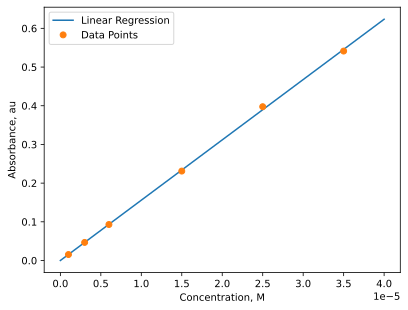

In [43]:
x = np.linspace(0, 4e-5, 10)
plt.plot(x, 1.55886e4 * x - 5.45355e-6, '-', label='Linear Regression')
plt.plot(C, A, 'o', label='Data Points')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Concentration, M')
plt.ylabel('Absorbance, au');

### 8.3.4 平衡化学方程式

矩阵也可以用于平衡化学方程，如下所示，其中 $x_1$ 到 $x_4$ 是平衡化学方程的系数。

$$ x_1 C_3H_{8} + x_2 O_2 \rightarrow x_3 CO_2 + x_4 H_2O $$

然后，我们可以使用 3 $\times$ 1 矩阵 $\left[ \begin{array}{c} C \\ H \\ O \end{array} \right]$ 描述每个化合物中的碳、氢和氧原子的数量，如下所示。

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] \rightarrow
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] +
   x_4 \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right]
$$

因为在平衡化学方程的两边，碳、氢和氧的数量应该是相同的，所以如果我们从反应物中减去生成物，我们应该得到零。

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] -
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] -
   x_4 \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right] =
   \left[ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right]
$$

这组线性方程的一个潜在问题是，使所有 $x$ 变量为零是一个有效的解决方案，为了避免这种解决方案，我们将设置其中一个 $x$ 变量为一。请记住，平衡化学方程是关于反应物和生成物之间适当比例的，因此设置一个系数为一仍然可以生成平衡方程。一个问题是，软件生成的系数可能不是整数，但这可以通过在最后一步将分数相乘以得到整数来解决，如下所示。

这里我们设置了 $x_4$ = 1。

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] -
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] -
   (1) \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right] =
   \left[ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right]
$$

现在我们将最后一项移到右边。

$$ x_1 \left[ \begin{array}{c} 3 \\ 8 \\ 0 \end{array} \right] +
   x_2 \left[ \begin{array}{c} 0 \\ 0 \\ 2 \end{array} \right] -
   x_3 \left[ \begin{array}{c} 1 \\ 0 \\ 2 \end{array} \right] = 
   \left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right]
$$

这些矩阵现在可以合并成一个更大的矩阵。下面的左矩阵将被称为 `M`，下面的右矩阵被称为 `b`。

$$ \left[ \begin{array}{ccc} 3 & 0 & -1 \\ 8 & 0 & 0 \\ 0 & 2 & -2 \end{array} \right]
\cdot
\left[ \begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array} \right]
=
\left[ \begin{array}{c} 0 \\ 2 \\ 1 \end{array} \right] $$

然后我们可以使用 `np.linalg.solve()` 函数求解 $x$ 值以获得我们的系数，如下所示。

In [44]:
M = np.array([[3, 0, -1], [8, 0, 0], [0, 2, -2]])
b = np.array([0, 2, 1]).T

sol = np.linalg.solve(M, b)
sol

array([0.25, 1.25, 0.75])

这意味着 $x_1$=0.25，$x_2$=1.25，和 $x_3$=0.75。我们可以在下面附加 $x_4$，然后将所有值乘以相同的数以生成所有整数。

In [45]:
sol = np.append(sol, 1)
sol * 4

array([1., 5., 3., 4.])

这意味着平衡化学方程的整数系数为 $x_1$=1，$x_2$=5，$x_3$=3，和 $x_4$=4。

$$ C_3H_{8} + 5 O_2 \rightarrow 3 CO_2 + 4 H_2O $$


### 8.3.5 特征值和特征向量

本节介绍如何使用 `np.linalg` 计算*特征值*和*特征向量*，这在量子力学等应用中非常有用。本书后面的内容不会使用到这个主题，所以如果你对这个主题不感兴趣，可以跳过这一节。

对于一个方阵 $A$，可以存在一个标量 $\lambda$ 和一个向量 $V$，使它们满足以下方程。

$$ AV = \lambda V $$

这个向量和标量分别被称为特征向量和特征值，对于任意给定的矩阵 $A$，可能有多个解。

`np.linalg` 模块包括一个函数 `np.linalg.eig()`，按以下顺序返回给定方阵的特征值和特征向量

~~~python
np.linalg.eig(matrix)
~~~

以此为例，我们可以确定以下矩阵的特征值和特征向量。

$$ A = \left[ \begin{array}{c} 3 & 1 \\ 4 & 3 \end{array} \right] $$

In [46]:
A = np.array([[3, 1], [4, 3]])
np.linalg.eig(A)

(array([5., 1.]),
 array([[ 0.4472136 , -0.4472136 ],
        [ 0.89442719,  0.89442719]]))

第一个数组包含两个特征值，而第二个矩阵包含两个特征向量解。

并非每个矩阵都有特征值或特征向量。在以下 90° 旋转矩阵的情况下，生成的解包括 $j$ 值，这是 Python 用于表示虚数和复数的符号。

$$ A = \left[ \begin{array}{c} 0 & -1 \\ 1 & 0 \end{array} \right] $$

In [47]:
A = np.array([[0, -1], [1, 0]])
np.linalg.eig(A)

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

## 8.4 微积分

SymPy 和 SciPy 都包含执行微积分操作的功能。我们将从 SymPy 的符号数学开始，并在第 8.4.3 节切换到 SciPy 进行纯数值计算。在本节中，我们将处理氢原子轨道的径向密度函数（$\psi$）。这些函数的平方（$\psi ^2$）提供了关于与原子核距离的电子寻找概率。虽然这些方程可以在各种教材中找到，但 SymPy 提供了一个 `physics` 模块，其中包含一个 `R_nl()` 函数，根据主要（*n*）量子数、角度（*l*）量子数和原子序数（*Z*）生成这些方程。例如，要生成氢的 2p 轨道的函数，*n* = 2，*l* = 1，*Z* = 1。

In [48]:
from sympy.physics.hydrogen import R_nl

In [49]:
r = sympy.symbols('r')
R_21 = R_nl(2, 1, r, Z=1)

In [50]:
R_21

sqrt(6)*r*exp(-r/2)/12

这提供了关于半径 *r* 的波函数方程。我们还可以使用 `sympy.lambdify()` 方法将其转换为 Python 函数。

In [51]:
f = sympy.lambdify(r, R_21, modules='numpy')

现在，只需为 *r* 提供一个值，就可以调用此函数。

In [52]:
f(0.5)

0.07948602207520471

### 8.4.1 微分

SymPy 可以使用 `sympy.diff()` 函数对数学表达式求导。这个函数需要一个数学表达式，表示导数的变量，以及度数。如果没有指定度数，默认行为是取一阶导数。

~~~python
sympy.diff(expr, r, deg)
~~~

以一个示例问题为例，最大密度的半径可以通过对径向方程求一阶导数并求解零斜率来找到。

In [53]:
dR_21 = sympy.diff(R_21, r, 1)
dR_21

-sqrt(6)*r*exp(-r/2)/24 + sqrt(6)*exp(-r/2)/12

In [54]:
mx = float(sympy.solve(dR_21)[0])

`solve()` 函数返回一个数组，所以我们需要对其进行索引以获取单个值。我们可以绘制径向密度和最大密度点以查看它是否有效。

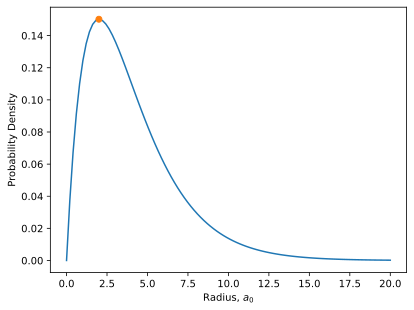

In [55]:
R = np.linspace(0,20,100)
plt.plot(R, f(R))
plt.plot(mx, f(mx), 'o')
plt.xlabel('Radius, $a_0$')
plt.ylabel('Probability Density');

半径以波尔（$a_0$）为单位，大约等于 0.53 埃。

### 8.4.2 函数积分

SymPy 还可以使用 `sympy.integrate()` 函数对表达式进行积分，该函数需要数学表达式和变量及以元组形式的积分范围。如果省略了积分范围，那么 SymPy 将返回一个符号表达式。

归一化（即总和为一）密度函数是平方波函数乘以 $r^2$（即，$\psi ^2 r^2$）。我们可以用这个来确定在一定距离范围内找到电子的概率。下面，我们从核到最大密度半径进行积分。

In [56]:
sympy.integrate(R_21**2 * r**2, (r,0, mx)).evalf()

0.0526530173437111

在核与最大概率半径之间找到电子的概率为 5.27%。这可能有点令人惊讶，但是检查径向密度图可以发现，最大概率半径非常接近核，最大半径之外的密度相当大。让我们查看在距离核 0 到 10 个波尔之间找到电子的概率。

In [57]:
sympy.integrate(R_21**2 * r**2, (r,0,10)).evalf()

0.970747311923039

在 0 到 10 埃之间找到电子的概率为 97.1%。

SciPy 库还包括 `integrate` 模块中的函数，用于积分数学函数。

### 8.4.3 积分采样数据

上述积分假设已知数学函数。有时候没有已知函数来描述数据，如光谱。这在核磁共振波谱（NMR）和气相色谱（GC）等许多应用中很常见，在这些应用中，波峰面积的积分被用来量化光谱中不同成分的比例。

在以下示例中，我们将使用一个 $^1H$ NMR 光谱的一部分，通过积分确定三个三重峰的比例。NMR 光谱通常存储在需要特殊库来读取的二进制文件中，这在第 11 章中有介绍。为简便起见，在此示例中，NMR 光谱的一部分数据已转换为名为 *Ar_NMR.csv* 的 CSV 文件。

In [ ]:
!wget https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_08/data/Ar_NMR.csv

In [58]:
nmr = np.genfromtxt('Ar_NMR.csv', delimiter=',')
nmr

array([[0.00000000e+00, 3.42490660e-03],
       [1.00000000e+00, 4.52560300e-03],
       [2.00000000e+00, 6.67372160e-03],
       [3.00000000e+00, 8.58410100e-03],
       [4.00000000e+00, 1.23892580e-02],
       [5.00000000e+00, 2.12517060e-02],
       [6.00000000e+00, 5.18062560e-02],
       [7.00000000e+00, 1.23403220e-01],
       [8.00000000e+00, 7.49717060e-02],
       [9.00000000e+00, 1.12987520e-01],
       [1.00000000e+01, 2.47482900e-01],
       [1.10000000e+01, 1.04401566e-01],
       [1.20000000e+01, 8.17907750e-02],
       [1.30000000e+01, 1.38453960e-01],
       [1.40000000e+01, 5.04080100e-02],
       [1.50000000e+01, 2.00982630e-02],
       [1.60000000e+01, 1.38752850e-02],
       [1.70000000e+01, 1.28241135e-02],
       [1.80000000e+01, 1.54948140e-02],
       [1.90000000e+01, 1.70803180e-02],
       [2.00000000e+01, 2.34651420e-02],
       [2.10000000e+01, 4.76330930e-02],
       [2.20000000e+01, 1.10299855e-01],
       [2.30000000e+01, 7.56612400e-02],
       [2.400000

导入的数据存储在一个数组中，其中第一列包含索引值，第二列包含振幅。

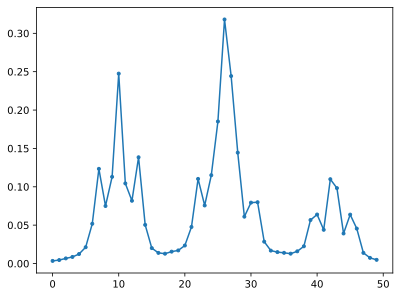

In [59]:
plt.plot(nmr[:,0],nmr[:,1], '.-');

上图是关于索引值（不是 ppm）的峰值图。要对每个三重峰下进行积分，首先我们需要每个峰的边缘的索引值。下面是一个列表 `i`，提供了合理的边界，下面的图中用橙色方框标出了这些边缘。

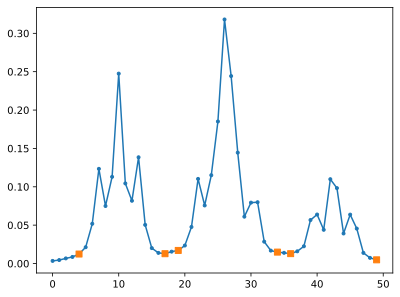

In [60]:
i = [(4, 17), (19, 34), (36, 49)]
plt.plot(nmr[:,1], '.-')
for pair in i:
    for point in pair:
        plt.plot(point, nmr[point,1], 'C1s')

在采样数据下的积分不包括数据点之间的值，因此这些区域是基于假设进行估计的。`trapz()` 函数假设已知点之间的任何数据点都直接位于已知数据点之间（即线性插值），如下图中的蓝线所示。

In [61]:
from scipy.interpolate import interp1d

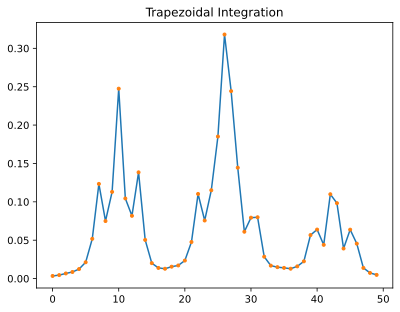

In [62]:
t = interp1d(nmr[:,0],nmr[:,1], kind='linear')
xnew = np.linspace(0,49, 50)

plt.plot(xnew, t(xnew), 'C0-')
plt.plot(nmr[:,0],nmr[:,1], 'C1.')
plt.title('Trapezoidal Integration')
plt.show()

另外，`simps()` 函数使用 *Simpson 法则* 对已知点之间的数据进行二次插值估计，如下图所示。

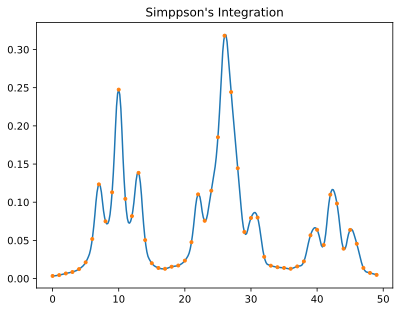

In [63]:
s = interp1d(nmr[:,0],nmr[:,1], kind='quadratic')
xnew = np.linspace(0,49, 300)

plt.plot(xnew, s(xnew), 'C0-')
plt.plot(nmr[:,0],nmr[:,1], 'C1.')
plt.title('Simppson\'s Integration')
plt.show()

这两个函数都按照这个顺序接受 `y` 和 `x` 值。下面使用梯形法。

In [64]:
from scipy.integrate import trapz

for peak in i:
    x = nmr[peak[0]:peak[1], 0]
    y = nmr[peak[0]:peak[1], 1]
    print(trapz(y, x))

1.0401881535
1.529880057
0.5834871775


这三个峰具有大约 2:3:1 的面积比例。在这里使用辛普森法则得到的结果大致相同。

### 8.4.4 积分常微分方程

*常微分方程（ODE）* 数学上描述了一个或多个因变量相对于自变量的变化。常见的化学应用包括化学动力学、扩散、电流等。SciPy `integrate` 模块提供了一个名为 `odeint()` 的 ODE 积分器，可用于积分常微分方程。这对于在动力学微分方程下积分以确定化学反应过程中反应物和生成物的浓度等问题非常有用。

例如，以下是以起始材料 A 和产物 P 为代表的一阶化学反应。

$$ A \rightarrow P $$

放射性同位素的衰变是一阶反应的一个例子，因为衰变速率与 A 的数量成正比。一阶反应速率由以下公式描述：

$$ Rate = \frac{d[A]}{dt} = -k[A] $$

其中 [A] 是 A 的浓度（M），$k$ 是速率常数（1/s），速率是 [A] 与时间（M/s）的变化。下面的 `odeint()` 函数接受一个以 Python 函数 `func` 形式的微分方程，A 的初始值 `A0`，以及一个用于计算 [A] 的时间列表或数组 `t`。

~~~python
scipy.integrate.odeint(func, A0, t)
~~~

Python 函数可以通过 `def` 语句或 lambda 表达式来定义。下面使用前者。

In [65]:
def rate_1st(A, t):
    return -k * A

函数应将因变量作为第一个位置参数，将自变量作为第二个位置参数。在此示例中，`A` 是因变量，时间 `t` 是自变量。如果有多个因变量，它们需要提供在一个复合对象（如列表或元组）中，可以通过索引或元组解包在函数内部解包。你可能还注意到 t 是我们 Python 函数中未使用的参数。它被包含在其中并告知 `odeint()` 自变量是 `t`。函数在由 `t` 定义的时间下进行积分，A 的初始浓度和速率常数分别为 `A0` 和 `k`。

In [66]:
from scipy.integrate import odeint
t = np.arange(0,50,4)  # time(seconds)
A0 = 1  # starting concentration (molarity)
k = 0.1  # rate constant in 1/s
A_t = odeint(rate_1st, A0, t)
P_t = A0 - A_t    # concentration of product

生成物（`P_t`）的浓度通过起始材料的初始浓度与当前浓度之间的差值计算得出。也就是说，我们假设消耗掉的起始材料已经变成了生成物。模拟结果已在下方进行了可视化。

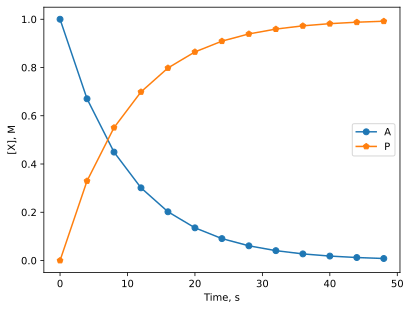

In [67]:
plt.plot(t, A_t, 'o-', label='A')
plt.plot(t, P_t, 'p-', label='P')
plt.xlabel('Time, s')
plt.ylabel('[X], M')
plt.legend();

这种动力学模拟方法可以适用于更复杂的反应，这在第 9.1.4 节中有示例。

## 8.5 Python 中的数学

在 SymPy、NumPy、SciPy 和 Python 的内置功能之间，通常有多种方法可以在 Python 中进行计算。例如，在本章中演示的方法中，找到多项式的根和导数可以通过创建 NumPy 的 `Polynomial` 对象并分别使用 NumPy 的 `roots()` 和 `deriv()` 方法来计算。如何进行计算往往取决于个人喜好，尽管在速度和输出格式方面存在差异。找到对你有效的方法，不必担心别人是否通过不同的库或一组函数进行相同的计算。

## 进一步阅读

1. SymPy 官网。[http://www.sympy.org/en/index.html](http://www.sympy.org/en/index.html)（免费资源）

2. SciPy 和 NumPy 文档页面。[https://docs.scipy.org/doc/](https://docs.scipy.org/doc/)（免费资源）

## 参考
[https://github.com/weisscharlesj/SciCompforChemists](https://github.com/weisscharlesj/SciCompforChemists)

## 练习

1. 使用 SymPy 分解以下多项式：$x^2 + x - 6$

2. 使用 SymPy 简化以下数学表达式：$ z = 3x + x^2 + 2xy $

3. 使用 SymPy 展开以下表达式：$(x - 2)(x + 5)(x)$

4. 一个质量为 53.2 g 的铅块（Cp = 0.128 J/g·°C）在 128 °C 时被投入一个质量为 238.1 g 的水中（Cp = 4.18 J/g·°C），这时水的温度为 25.0 °C。铅和水的最终温度是多少？
提示：假设这是一个封闭系统，所以 $q_{lead}$ + $q_{water}$ = 0。我们还知道 $q = mCp \Delta T$。

5. 以下方程式表示了与平衡常数 K 有关的 $\Delta G$：

$$ \Delta G = \Delta G^o - RT ln(K) $$

若某化学反应的 $\Delta G^o$ = -1.22 kJ/mol，那么在 298 K 时，这个反应的 K 值是多少？使用 `sympy.solve()` 函数求解此问题。请记住，在平衡状态下 $\Delta G$ = 0 kJ/mol，请注意能量单位。（R = 8.314 J/mol·K）

6. 在二维平面上，一个由 x,y 坐标组成的矩阵或数组可以通过与以下旋转矩阵（$M_R$）相乘来围绕原点进行旋转。角度（$\theta$）以弧度为单位，坐标围绕原点顺时针旋转。

    $$ M_R = \left[ \begin{array}{cc} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{array} \right] $$

    以下是一个使用 x,y 平面上的三个通用点的示例。

    $$ \left[ \begin{array}{cc} x_0 & y_0 \\ x_1 & y_1 \\ x_2 & y_2 \end{array} \right] 
    \cdot  
    \left[ \begin{array}{cc} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{array} \right]  
    =
    \left[ \begin{array}{cc} x'_0 & y'_0 \\ x'_1 & y'_1 \\ x'_2 & y'_2 \end{array} \right]
    $$
    
    a) 给定碳酸根（$CO_3^{2-}$）中四个原子的以下坐标，以埃为单位，将它们顺时针旋转 $90^o$。在不同的颜色中绘制初始点和旋转后的点以证明它有效。
    
    $$ C: (2.00, 2.00) \quad O1: (2.00, 3.28) \quad O2: (0.27, 1.50) \quad O3: (3.73, 1.50) $$
    
    b) 将上述代码打包成一个函数，该函数接受一个点的数组和一个角度，并执行上述旋转。

7. 使用上述问题中描述的旋转矩阵，编写一个函数，使碳酸根离子围绕其自身质心旋转。完成此任务的建议步骤如下所示。

    a) 计算质心

    b) 从所有点中减去质心，将簇移至原点。

    c) 旋转点簇。

    d) 将质心添加回簇，将点移回。

8. 以下是固定气体量的活塞通过可逆、等温（即，恒定T）膨胀所做的功的方程式：

$$ w = \int_{v_i}^{v_f} -nRT \frac{1}{V}dV $$

a) 使用SymPy，对$V_i$ $\rightarrow$ $V_f$的这个表达式进行符号积分。尝试让SymPy简化答案，看看是否有更简单的形式。

b) 对上面的表达式积分，求2.44 mol的He气体在298K下从0.552L膨胀至1.32L的过程。可以选择使用SymPy或SciPy。

9. 使用`odeint()`，模拟下面的二阶反应的起始物质浓度，并将其与二阶积分速率定律叠加，以证明它们是一致的。

    $$ 2A \rightarrow P $$

10. B下面是群论中用于$S_4$和$C_2$操作的变换矩阵。通过将两个$S_4$操作相乘，证明两个$S_4$操作等于一个$C_2$操作。也就是说，证明$S_4S_4$ = $C_2$。

$$
S_4 = \left[ \begin{array}{ccc} 0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & -1 \end{array} \right]
\quad
C_2 = \left[ \begin{array}{ccc} -1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1 \end{array} \right]
$$